In [152]:
module Vector2Ds

    export Vector2D, xdot, sin, cos
    using LinearAlgebra # - чтобы стали доступными фунции dot (скалярное произведение), norm (длина вектора)

    Vector2D{T<:Real} = Tuple{T,T}

    Base. cos(a::Vector2D, b::Vector2D) = dot(a,b)/norm(a)/norm(b)
    xdot(a::Vector2D, b::Vector2D) = -a[1]*b[2]+a[2]*b[1]
                # xdot(a,b)=|a||b|sin(a,b) - косое произведение
    Base. sin(a::Vector2D, b::Vector2D) = xdot(a,b)/norm(a)/norm(b)

    """
        randpoints(random::Function, num::Integer)

    - random - функция, возвращающая случайное значение с требуемым рампределением
    - возвращает одномерный массив длины num случайных точек плоскости 
    """
    randpoints(random::Function, num::Integer) = [(random(),random()) for _ in 1:num]
end

Main.Vector2Ds

Задача 1

In [153]:
points=[s for s in zip([1.0,0.0,3.0,5.0,4.0,2.0,3.0,4.5],[0.0,2.0,7.0,2.0,-3.0,1.0,4.0,1.0])]

8-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (0.0, 2.0)
 (3.0, 7.0)
 (5.0, 2.0)
 (4.0, -3.0)
 (2.0, 1.0)
 (3.0, 4.0)
 (4.5, 1.0)

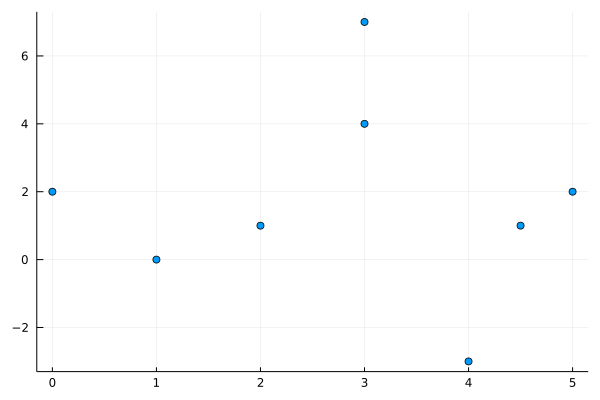

In [154]:
using Plots
p=plot()
scatter(points; legend = false) 

In [155]:
function min_point(p,v,points)
    min=p
    min_ug=2pi
   for x in points
        if x!=p && ugol((x[1]-p[1],x[2]-p[2]),v)<min_ug
            min_ug=ugol((x[1]-p[1],x[2]-p[2]),v)
            min=x
        end
    end
    return min
end

min_point (generic function with 1 method)

In [156]:
function ugol(v1,v2)
    c=cos(v1,v2)
    s=sin(v1,v2)
    if c==0
        if s>0
            return pi/2
        else
            return 3pi/2
        end
    end
    if s==0
        if c>0
            return 0
        else
            return pi
        end
    end
    if c>0 && s>0 || c<0 && s>0
        return acos(c)
    elseif c<0 && s<0
        return pi-asin(s)
    elseif c>0 && s<0
        return 2pi+asin(s)
    end
    return 2pi
end

ugol (generic function with 1 method)

In [157]:
function jarvis(points)
    res=[]
    push!(res,points[1])
    m=1
    for i in 1:length(points)
        if reverse(points[i])<reverse(res[1])
            res[1]=points[i]
        end
    end
    p=res[1]
    v=(1,0)
    min=min_point(p,v,points)
    while min!=res[1] && length(res)<10
        push!(res,min)
        v=((min[1]-p[1]),(min[2]-p[2]))
        p=min
        min=min_point(p,v,points)
    end
    push!(res,res[1])
    return res
end

jarvis (generic function with 1 method)

In [158]:
res=jarvis(points)

6-element Vector{Any}:
 (4.0, -3.0)
 (5.0, 2.0)
 (3.0, 7.0)
 (0.0, 2.0)
 (1.0, 0.0)
 (4.0, -3.0)

In [159]:
x=[]
y=[]
for a in res
    push!(x,a[1])
    push!(y,a[2])
end

In [160]:
mnog=[s for s in zip(x,y)]

6-element Vector{Tuple{Float64, Float64}}:
 (4.0, -3.0)
 (5.0, 2.0)
 (3.0, 7.0)
 (0.0, 2.0)
 (1.0, 0.0)
 (4.0, -3.0)

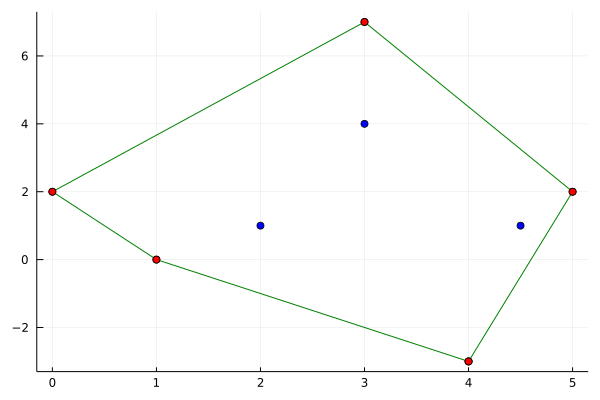

In [161]:
using Plots
p=plot()
scatter!(points;legend=false,markercolor=:blue)
plot!(mnog, linecolor=:green,markershape=:circle,markercolor=:red)

Задача 2

In [162]:
points=[s for s in zip([1.0,0.0,3.0,5.0,4.0,2.0,3.0,4.5],[0.0,2.0,7.0,2.0,-3.0,1.0,4.0,1.0])]

8-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (0.0, 2.0)
 (3.0, 7.0)
 (5.0, 2.0)
 (4.0, -3.0)
 (2.0, 1.0)
 (3.0, 4.0)
 (4.5, 1.0)

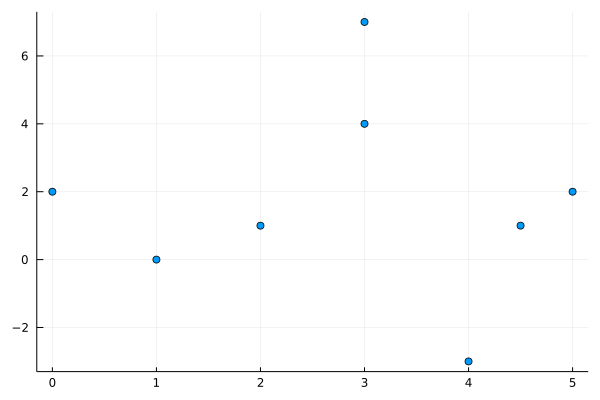

In [163]:
using Plots
p=plot()
scatter(points; legend = false) 

In [164]:
function rot(a,b,c)
    return pi>=ugol((b[1]-a[1],b[2]-a[2]),(c[1]-a[1],c[2]-a[2]))
end

rot (generic function with 1 method)

In [165]:
function grehom(points)
    res=[]
    push!(res,points[1])
    m=1
    for i in 1:length(points)
        if reverse(points[i])<reverse(res[1])
            res[1]=points[i]
        end
    end
    for i in 2:length(points)
        j = i
        while j>1 && rot(points[1],points[j-1],points[j]) 
          points[j], points[j-1] = points[j-1], points[j]
          j -= 1
        end
    end
    s = [points[1],points[2]]
    for i in 2:length(points)
        while rot(s[length(s)-1],s[length(s)],points[i]) && length(s)>2
          pop!(s)
        end
        push!(s,points[i])
    end
    push!(s,s[1])
    return s
end

grehom (generic function with 1 method)

In [166]:
res=grehom(points)

7-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (4.0, -3.0)
 (4.0, -3.0)
 (5.0, 2.0)
 (3.0, 7.0)
 (0.0, 2.0)
 (1.0, 0.0)

In [167]:
x=[]
y=[]
for a in res
    push!(x,a[1])
    push!(y,a[2])
end

In [168]:
mnog=[s for s in zip(x,y)]

7-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (4.0, -3.0)
 (4.0, -3.0)
 (5.0, 2.0)
 (3.0, 7.0)
 (0.0, 2.0)
 (1.0, 0.0)

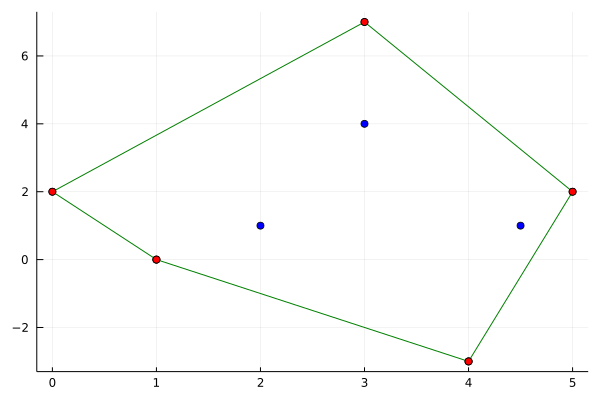

In [169]:
using Plots
p=plot()
scatter!(points;legend=false,markercolor=:blue)
plot!(mnog, linecolor=:green,markershape=:circle,markercolor=:red)

Задача 3

In [170]:
points=[s for s in zip([1.0,0.0,3.0,5.0,4.0,2.5,1.0],[0.0,2.0,7.0,2.0,-3.0,4.0,0.0])]

7-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (0.0, 2.0)
 (3.0, 7.0)
 (5.0, 2.0)
 (4.0, -3.0)
 (2.5, 4.0)
 (1.0, 0.0)

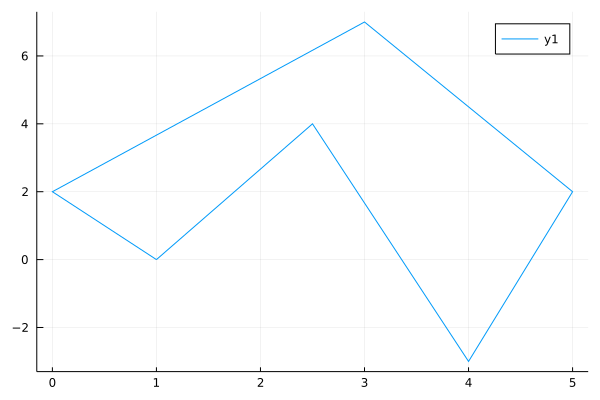

In [171]:
using Plots
p=plot()
plot!(points) 

In [172]:
function plosh_trap(points)
    s=0
    for i in 2:length(points)
        s=s+1/2*(points[i-1][2]+points[i][2])*(points[i][1]-points[i-1][1])
    end
    return s
end

plosh_trap (generic function with 2 methods)

In [173]:
plosh_trap(points)

18.25

Задача 4

In [174]:
points=[s for s in zip([1.0,0.0,3.0,5.0,4.0,2.5,1.0],[0.0,2.0,7.0,2.0,-3.0,4.0,0.0])]

7-element Vector{Tuple{Float64, Float64}}:
 (1.0, 0.0)
 (0.0, 2.0)
 (3.0, 7.0)
 (5.0, 2.0)
 (4.0, -3.0)
 (2.5, 4.0)
 (1.0, 0.0)

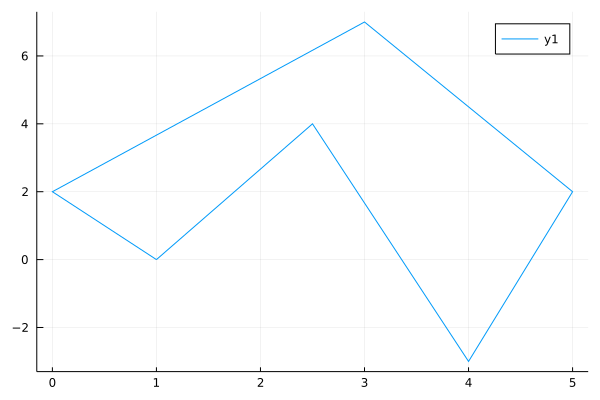

In [175]:
using Plots
p=plot()
plot!(points) 

In [176]:
function plosh_treug(points)
    s=0
    for i in 2:length(points)
        s=s+1/2*(-points[i-1][1]*points[i][2]+points[i-1][2]*points[i][1])
    end
    return s
end

plosh_treug (generic function with 1 method)

In [177]:
plosh_treug(points)

18.25

Обратим внимание, что в задачах 3 и 4 вывод совпал